In [1]:
import pandas as pd

In [2]:
shared_data_read_only/Education-Data/SDP_College_Matriculation_2021-2022.csv
shared_data_read_only/Education-Data/2023-2024 Master School List (20231003).csv

SyntaxError: invalid decimal literal (2459905683.py, line 1)

In [3]:
import os

In [4]:
os.getcwd()

'/home/jupyter-user-1'

In [5]:
college_matriculation= pd.read_csv('shared_data_read_only/Education-Data/SDP_College_Matriculation_2021-2022.csv')
master_set= pd.read_csv('shared_data_read_only/Education-Data/2023-2024 Master School List (20231003).csv')

In [6]:
# Merge college_matriculation and master_set on the 'schoolname' column
merged_data = pd.merge(college_matriculation, master_set, on='ULCS Code', how='inner')

# Display the merged DataFrame
merged_data.head()

,School Year,ULCS Code,School Name,Number of Graduates,First-Fall Matriculation Rate,PA Code,NSC Code,NCES Code,AUN Code,SRC School ID,...,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12
0,2021-2022,1010,John Bartram High School,120,25.83,3847.0,393345,4.218990e+11,126515001.0,101,...,0,0,0,0,0,0,1,1,1,1
1,2021-2022,1020,West Philadelphia High School,81,35.80,3860.0,393555,4.218990e+11,126515001.0,102,...,0,0,0,0,0,0,1,1,1,1
2,2021-2022,1030,High School of the Future,133,35.34,7903.0,392779,4.218990e+11,126515001.0,103,...,0,0,0,0,0,0,1,1,1,1
3,2021-2022,1050,Paul Robeson High School for Human Services,79,39.24,7780.0,393347,4.218990e+11,126515001.0,105,...,0,0,0,0,0,0,1,1,1,1
4,2021-2022,1100,William L. Sayre High School,85,23.53,7245.0,393944,4.218990e+11,126515001.0,110,...,0,0,0,0,0,0,1,1,1,1


In [7]:
print(merged_data.columns)


Index(['School Year', 'ULCS Code', 'School Name', 'Number of Graduates',
       'First-Fall Matriculation Rate', 'PA Code', 'NSC Code', 'NCES Code',
       'AUN Code', 'SRC School ID', 'School Name (ULCS)', 'Publication Name',
       'Publication Name Alpha List', 'Abbreviated Name', 'Year Opened',
       'School Level', 'Admission Type', 'Current Grade Span Served',
       'Grade Span at Scale', 'Phasing-In', 'Phasing-Out', 'Governance',
       'Management Organization', 'School Reporting Category',
       'Alternate Education Type', 'Major Intervention',
       'Major Intervention Year', 'Community School Cohort', 'CTE Status',
       'Title I Designation', 'Federal Accountability Designation',
       'City Council District', 'GPS Location', 'Multiple Addresses',
       'Street Address', 'City', 'State', 'Zip Code', 'Phone Number',
       'Fax Number', 'Website', 'School Leader Name', 'Learning Network',
       'Assistant Superintendent', 'FACE Liaison Name', 'FACE Liaison Email',
  

In [12]:
# Select relevant columns
matriculation_data = merged_data[['School Name', 'First-Fall Matriculation Rate', 'Zip Code']]

# Group by 'Zip Code' and calculate the mean matriculation rate
grouped_data = matriculation_data.groupby('Zip Code')['First-Fall Matriculation Rate'].mean().reset_index()

In [14]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:

# Select relevant columns
matriculation_data = merged_data[['School Name', 'First-Fall Matriculation Rate', 'Zip Code']]

# Group by 'Zip Code' and calculate the mean matriculation rate
grouped_data = matriculation_data.groupby(['Zip Code', 'School Name'])['First-Fall Matriculation Rate'].mean().unstack().reset_index()

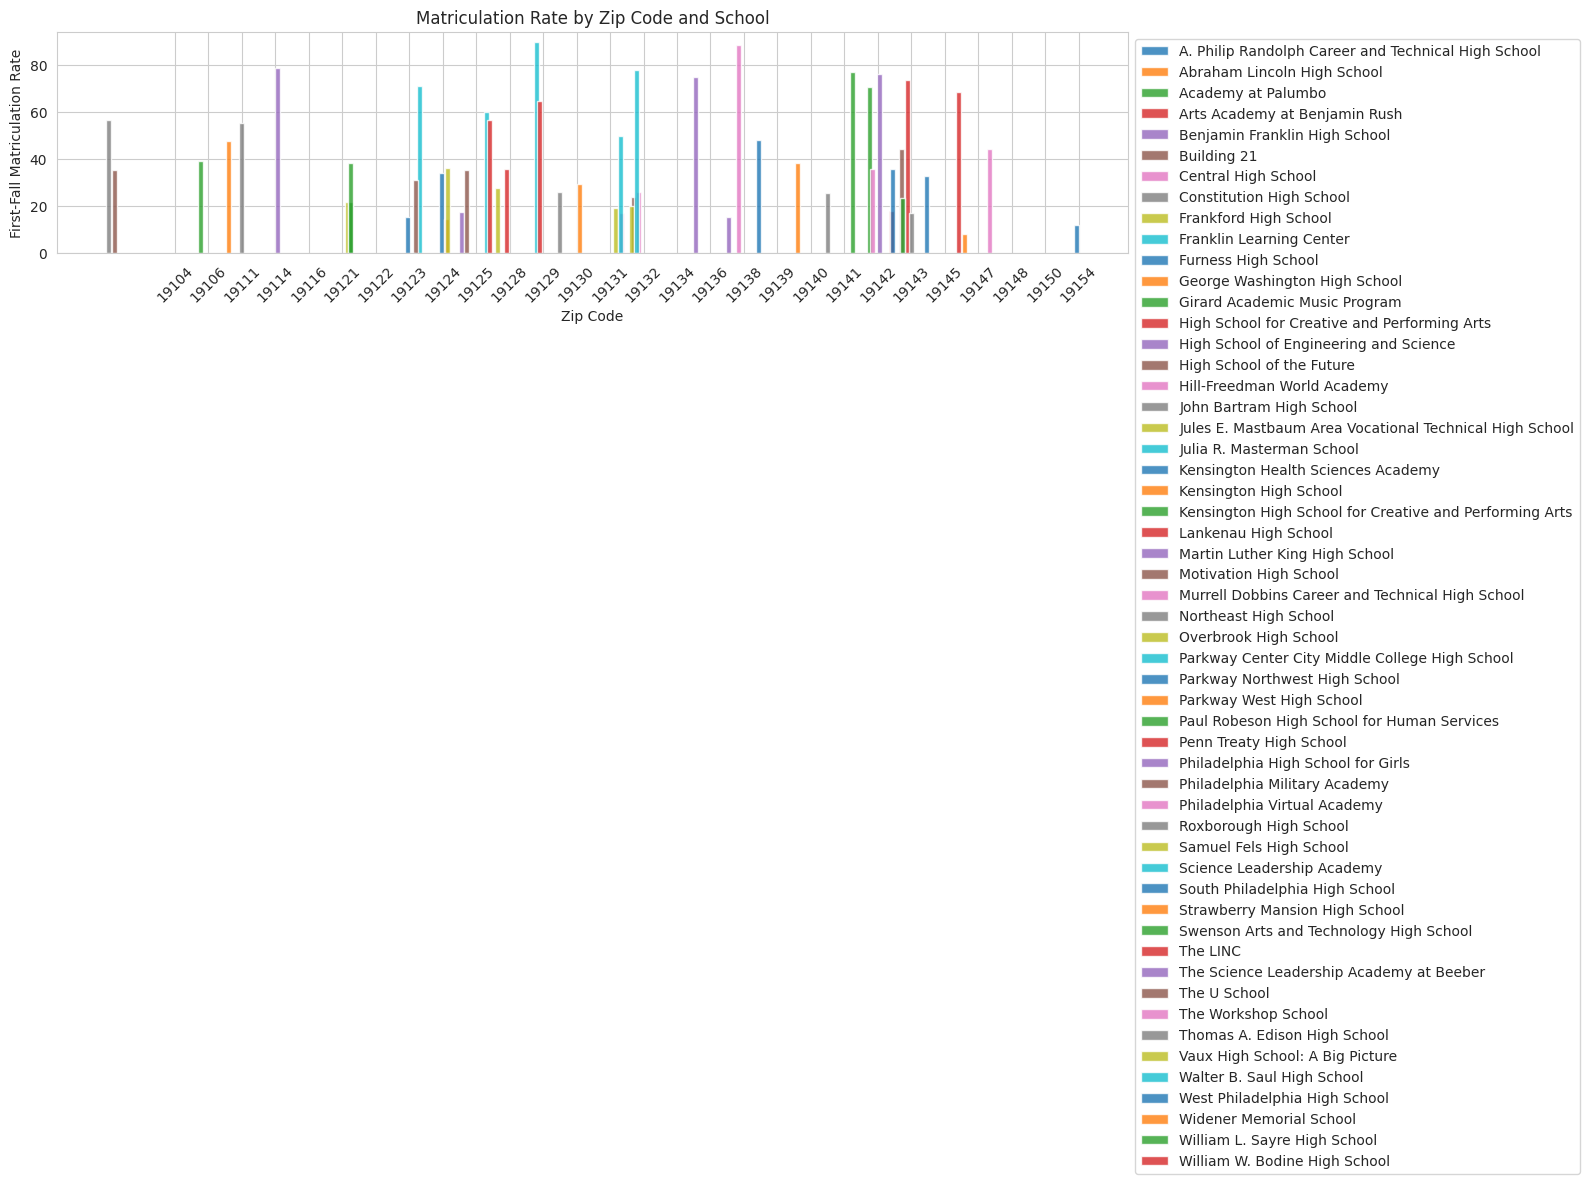

In [20]:
# Set the figure size
plt.figure(figsize=(16, 8))

# Create the grouped bar graph
bar_width = 0.15
index = grouped_data['Zip Code']
labels = grouped_data['Zip Code']
x = range(len(index))

# Plot bars for each school
for i, school in enumerate(grouped_data.columns[1:]):
    plt.bar([p + bar_width * i for p in x], grouped_data[school], width=bar_width, label=school, alpha=0.8)

plt.xlabel('Zip Code')
plt.ylabel('First-Fall Matriculation Rate')
plt.title('Matriculation Rate by Zip Code and School')
plt.xticks([p + 0.5 * bar_width * (len(grouped_data.columns) - 1) for p in x], labels, rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show plot
plt.show()

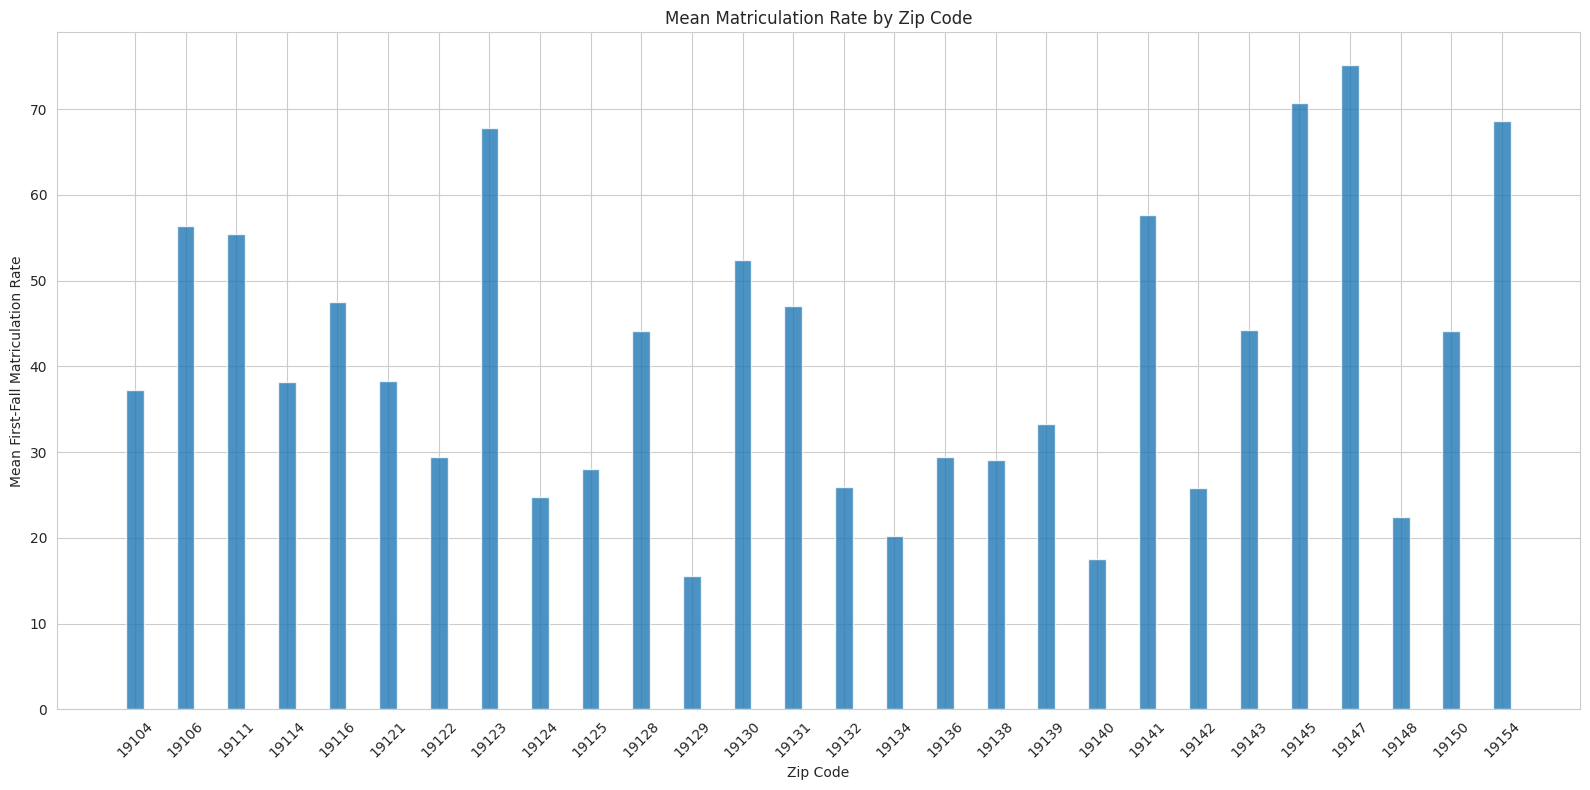

In [37]:

import pandas as pd
import matplotlib.pyplot as plt

# Select relevant columns
matriculation_data = merged_data[['School Name', 'First-Fall Matriculation Rate', 'Zip Code']]

# Group by 'Zip Code' and calculate the mean matriculation rate
grouped_data = matriculation_data.groupby('Zip Code')['First-Fall Matriculation Rate'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(16, 8))

# Create the bar graph
bar_width = 0.35
index = range(len(grouped_data))
labels = grouped_data['Zip Code']
x = range(len(index))

# Plot bars for each zip code
plt.bar(x, grouped_data['First-Fall Matriculation Rate'], width=bar_width, alpha=0.8)

plt.xlabel('Zip Code')
plt.ylabel('Mean First-Fall Matriculation Rate')
plt.title('Mean Matriculation Rate by Zip Code')
plt.xticks([p for p in x], labels, rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [21]:
grad_rates= pd.read_csv('shared_data_read_only/Education-Data/SDP_Graduation_Rates_School_S_2023-02-15.csv')

In [24]:
# Filter the DataFrame
filtered_grad_data = grad_rates[(grad_rates['group'] == 'IEP') & 
                            (grad_rates['cohort'] == '2018-2019') ]
                          

# Display the filtered DataFrame
filtered_grad_data.head()

,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score
25137,2018-2019,1010,John Bartram High School,District,4-Year Graduation Rate,IEP,Does Not Have IEP,113,88,77.88
25138,2018-2019,1010,John Bartram High School,District,4-Year Graduation Rate,IEP,Has IEP,44,26,59.09
25150,2018-2019,1020,West Philadelphia High School,District,4-Year Graduation Rate,IEP,Does Not Have IEP,69,54,78.26
25151,2018-2019,1020,West Philadelphia High School,District,4-Year Graduation Rate,IEP,Has IEP,33,17,51.52
25164,2018-2019,1030,High School of the Future,District,4-Year Graduation Rate,IEP,Does Not Have IEP,107,98,91.59


In [25]:
filtered_grad_data

,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score
25137,2018-2019,1010,John Bartram High School,District,4-Year Graduation Rate,IEP,Does Not Have IEP,113,88,77.88
25138,2018-2019,1010,John Bartram High School,District,4-Year Graduation Rate,IEP,Has IEP,44,26,59.09
25150,2018-2019,1020,West Philadelphia High School,District,4-Year Graduation Rate,IEP,Does Not Have IEP,69,54,78.26
25151,2018-2019,1020,West Philadelphia High School,District,4-Year Graduation Rate,IEP,Has IEP,33,17,51.52
25164,2018-2019,1030,High School of the Future,District,4-Year Graduation Rate,IEP,Does Not Have IEP,107,98,91.59
...,...,...,...,...,...,...,...,...,...,...
26139,2018-2019,8870,One Bright Ray Mansion Evening,Alternative,4-Year Graduation Rate,IEP,Has IEP,1,s,s
26150,2018-2019,8890,One Bright Ray - Simpson Campus,Alternative,4-Year Graduation Rate,IEP,Does Not Have IEP,93,s,s
26151,2018-2019,8890,One Bright Ray - Simpson Campus,Alternative,4-Year Graduation Rate,IEP,Has IEP,8,s,s
26161,2018-2019,8891,One Bright Ray Simpson - Evening,Alternative,4-Year Graduation Rate,IEP,Does Not Have IEP,18,s,s


In [27]:
# Merge filtered_data and master_set on the different 'ULCS Code' columns
merged_filtered_data = pd.merge(filtered_grad_data, master_set, left_on='schoolid_ulcs', right_on='ULCS Code', how='inner')

# Display the merged DataFrame
merged_filtered_data.head()

,cohort,schoolid_ulcs,schoolname,sector,rate_type,group,subgroup,denom,num,score,...,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12
0,2018-2019,1010,John Bartram High School,District,4-Year Graduation Rate,IEP,Does Not Have IEP,113,88,77.88,...,0,0,0,0,0,0,1,1,1,1
1,2018-2019,1010,John Bartram High School,District,4-Year Graduation Rate,IEP,Has IEP,44,26,59.09,...,0,0,0,0,0,0,1,1,1,1
2,2018-2019,1020,West Philadelphia High School,District,4-Year Graduation Rate,IEP,Does Not Have IEP,69,54,78.26,...,0,0,0,0,0,0,1,1,1,1
3,2018-2019,1020,West Philadelphia High School,District,4-Year Graduation Rate,IEP,Has IEP,33,17,51.52,...,0,0,0,0,0,0,1,1,1,1
4,2018-2019,1030,High School of the Future,District,4-Year Graduation Rate,IEP,Does Not Have IEP,107,98,91.59,...,0,0,0,0,0,0,1,1,1,1


In [28]:
print(merged_filtered_data.columns)

Index(['cohort', 'schoolid_ulcs', 'schoolname', 'sector', 'rate_type', 'group',
       'subgroup', 'denom', 'num', 'score', 'PA Code', 'NSC Code', 'NCES Code',
       'AUN Code', 'ULCS Code', 'SRC School ID', 'School Name (ULCS)',
       'Publication Name', 'Publication Name Alpha List', 'Abbreviated Name',
       'Year Opened', 'School Level', 'Admission Type',
       'Current Grade Span Served', 'Grade Span at Scale', 'Phasing-In',
       'Phasing-Out', 'Governance', 'Management Organization',
       'School Reporting Category', 'Alternate Education Type',
       'Major Intervention', 'Major Intervention Year',
       'Community School Cohort', 'CTE Status', 'Title I Designation',
       'Federal Accountability Designation', 'City Council District',
       'GPS Location', 'Multiple Addresses', 'Street Address', 'City', 'State',
       'Zip Code', 'Phone Number', 'Fax Number', 'Website',
       'School Leader Name', 'Learning Network', 'Assistant Superintendent',
       'FACE Liaison 

In [30]:
# Create a new DataFrame with only 'Zip Code' and 'score' columns
score_zip_data = merged_filtered_data[['Zip Code', 'score']]

# Display the new DataFrame
score_zip_data

,Zip Code,score
0,19142,77.88
1,19142,59.09
2,19139,78.26
3,19139,51.52
4,19104,91.59
...,...,...
150,19121,s
151,19124,s
152,19124,s
153,19124,s


In [34]:
# Convert 'score' column to numeric
score_zip_data.loc[:, 'score'] = pd.to_numeric(score_zip_data['score'], errors='coerce')

# Calculate the average score for each zip code
avg_score_zip_data = score_zip_data.groupby('Zip Code')['score'].mean().reset_index()

# Display the new DataFrame with average score for each zip code
avg_score_zip_data


,Zip Code,score
0,19104,88.187500
1,19106,NaN
2,19111,73.525000
3,19114,93.315000
4,19116,63.400000
5,19120,NaN
6,19121,31.360000
7,19122,70.057500
8,19123,21.970000
9,19124,41.506667


In [35]:
avg_score_zip_data.to_csv('avg_score_zip_data.csv', index=False)
